### Import required libraries

In [3]:
# For dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Processing data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Prepare Data for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

### Load Churn Dataset

In [4]:
# load dataset
dataset = pd.read_csv('churn.csv', sep = ',')
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Churn Dataset Description :


    -Customer ID : Customer ID of the subscriber
    -Gender: Whether the customer is a male or a female
    -Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
    -Partner: Whether the customer has a partner or not (Yes, No)
    -Dependents: Whether the customer has dependents or not (Yes, No)
    -Tenure: Number of months the customer has stayed with the company
    -Phone Service: Whether the customer has a phone service or not (Yes, No)
    -Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    -Internet Service: Customer’s internet service provider (DSL, Fiber optic, No)
    -Online Security: Whether the customer has online security or not (Yes, No, No internet service)
    -Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
    -Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
    -Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
    -Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    -Streaming Movies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    -Contract: The contract term of the customer (Month-to-month, One year, Two year)
    -Paperless Billing: Whether the customer has paperless billing or not (Yes, No)
        Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    -Monthly Charges: The amount charged to the customer monthly
    -Total Charges: The total amount charged to the customer
    -Churn: Whether the customer churned or not (Yes or No)

In [5]:
df = dataset.copy()

### Lenght of the dataset :

In [6]:
df.index #Describe index

RangeIndex(start=0, stop=7043, step=1)

### Shape of the dataset :

In [7]:
df.shape #(rows,columns)

(7043, 21)

### Columns name :

In [8]:
df.columns #Describe DataFrame columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Feature Engineering

In [9]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


    # : number of functions in the data framework
    Column: Features header in the Dataframe
    Non-null Count: Counter of nonzero values for each Dataframe function
    Type: type of data stored for each function of the data frame

This dataset doesn't have any "?" values or Nan, however the TotalCharges are of type object because of empty strings, we can not convert them to float.

In [10]:
MissingValues = {col:df[df[col] == " "].shape[0] for col in df.columns}
MissingValues

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

Let's replace them with nan value, so we can manipulate them easier.

In [11]:
nan_value = np.nan
df.replace(" ", nan_value, inplace=True)

In [12]:
df.isnull().sum() #Number of NA values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Before using the dataset we need to convert the column with numerical value from type objet to int or float values.

In [13]:
NumberOfUniqueValues = {col:df[col].unique().shape[0] for col in df.columns}
NumberOfUniqueValues

{'customerID': 7043,
 'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531,
 'Churn': 2}

Remark : Out of 7043 rows in our dataset, there are 7043 different value of customerID. Thus, customerID is not a relevant column except the fact that each row is a unique client for us to analyse. We will remote the column later.

In [14]:
UniqueValues = {col:df[col].unique() for col in df.columns}
UniqueValues

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], 

As we showed in the selection above, some columns with Dtype object have boolean value, Yes or No, plus string values dispatching a service. To convert this column to numerical form, we need to encode them. We could use a python function like OneHotEncoder or Get_dummy to allocate for a very specific value a column, however, I chose to replace them myself with the function replace.

In [15]:
# Replace columns with number
df = df.replace("Female", 1)
df = df.replace("Male", 0)
df = df.replace("Yes", 1)
df = df.replace("No", 0)
df = df.replace("No phone service", 2)
df = df.replace("No internet service", 2)
df = df.replace("DSL", 1)
df = df.replace("Fiber optic", 2)
df = df.replace("Month-to-month", 0)
df = df.replace("One year", 1)
df = df.replace("Two year", 2)
df = df.replace("Electronic check", 0)
df = df.replace("Mailed check", 1)
df = df.replace("Bank transfer (automatic)", 2)
df = df.replace("Credit card (automatic)", 3)

Now it is time to convert the remaining columns to float

In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Every column has been convert to numerical values.

## Summary

In [18]:
df.describe() #Statistical summary of DataFrame

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2283.298340,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.770508,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.799999,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450012,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475098,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737549,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.799805,1.000000


    count: number of examples counted for the selected function
    mean: arithmetic mean for the selected function
    std: standard deviation for the selected function
    min: minimum value presented by the examples for the selected function
    25%: first quartile calculated on the examples for the selected function
    50%: second quartile calculated on the examples for the selected function
    75%: third quartile calculated on examples for selected feature
    max: maximum value presented by the examples for the selected function

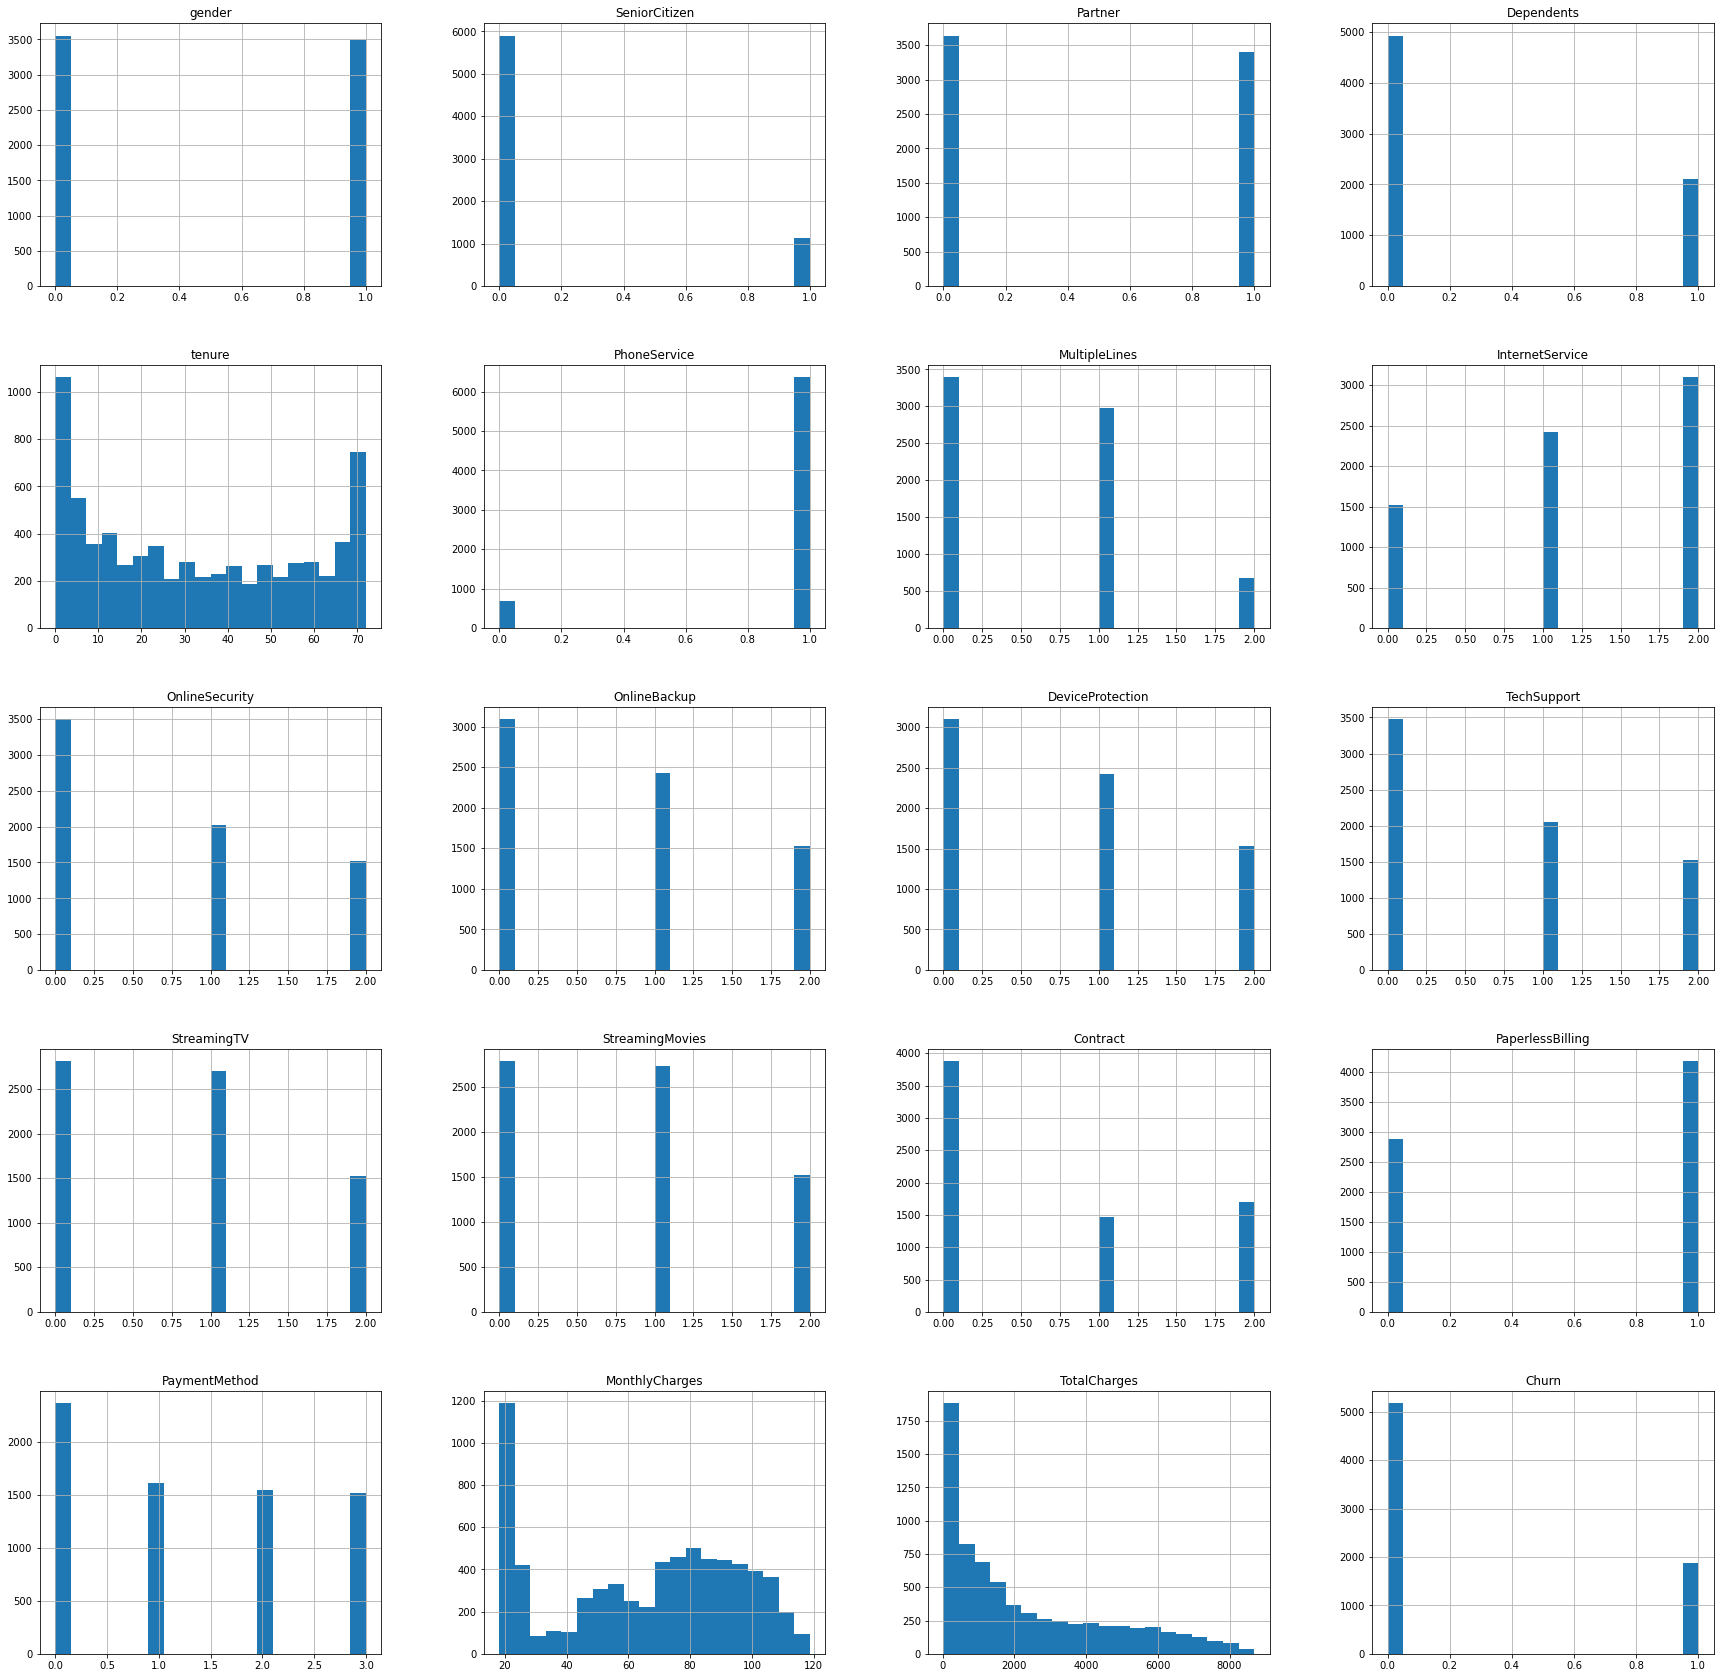

In [19]:
df.hist(bins=20, figsize=(30,30));

The data follows a normal distribution.

### Removre outliers

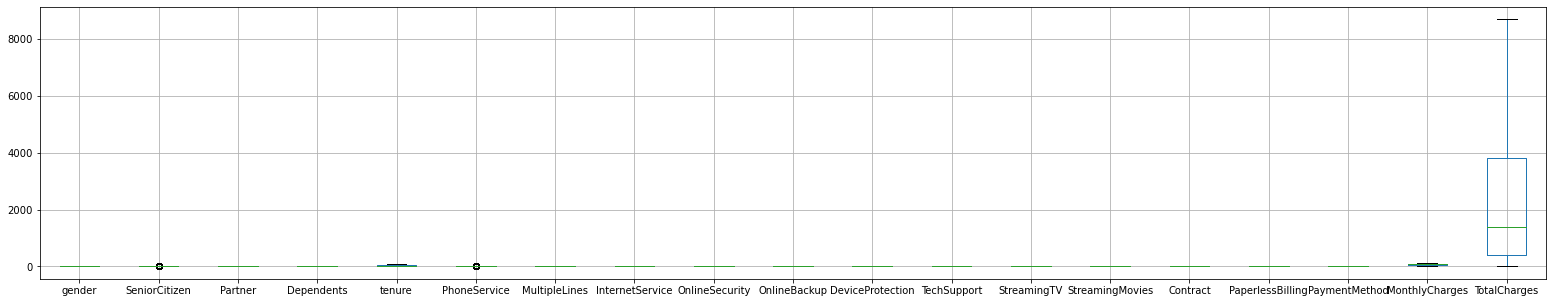

In [20]:
plt.figure(figsize=(27,5))
df.iloc[:,0:-1].boxplot()
plt.show()

In [21]:
for x in ['SeniorCitizen']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [22]:
for x in ['PhoneService']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [23]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
PhoneService         682
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [24]:
df = df.dropna()

In [25]:
df.count() #Number of non-NA values

customerID          5314
gender              5314
SeniorCitizen       5314
Partner             5314
Dependents          5314
tenure              5314
PhoneService        5314
MultipleLines       5314
InternetService     5314
OnlineSecurity      5314
OnlineBackup        5314
DeviceProtection    5314
TechSupport         5314
StreamingTV         5314
StreamingMovies     5314
Contract            5314
PaperlessBilling    5314
PaymentMethod       5314
MonthlyCharges      5314
TotalCharges        5314
Churn               5314
dtype: int64

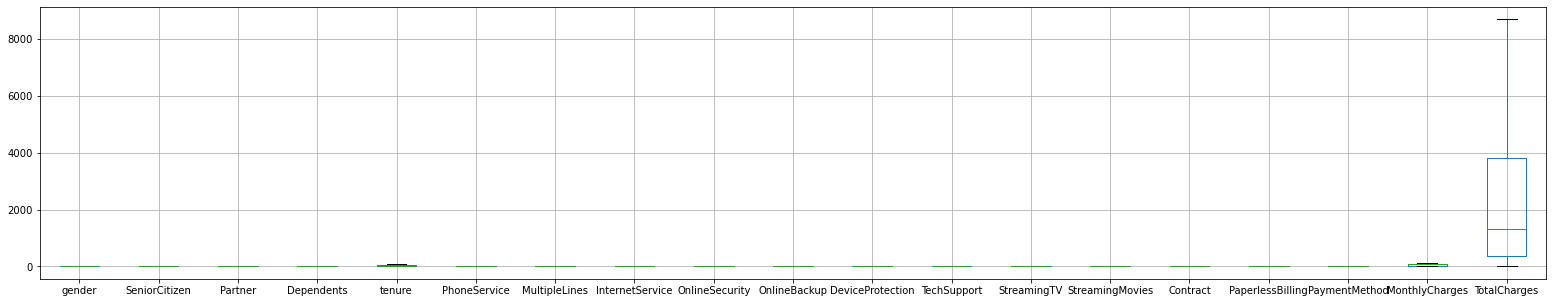

In [26]:
plt.figure(figsize=(27,5))
df.iloc[:,1:-1].boxplot()
plt.show()

# Visualizing the data

0    4047
1    1267
Name: Churn, dtype: int64


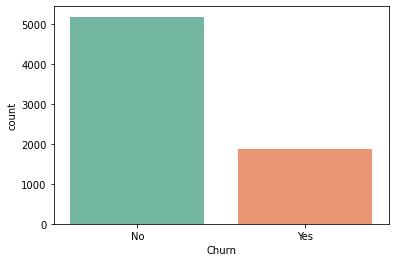

In [27]:
# The ratio of Churn
sns.countplot(x="Churn", data=dataset, palette='Set2')
print(df['Churn'].value_counts())

<AxesSubplot:title={'center':'gender'}, xlabel='gender', ylabel='Count'>

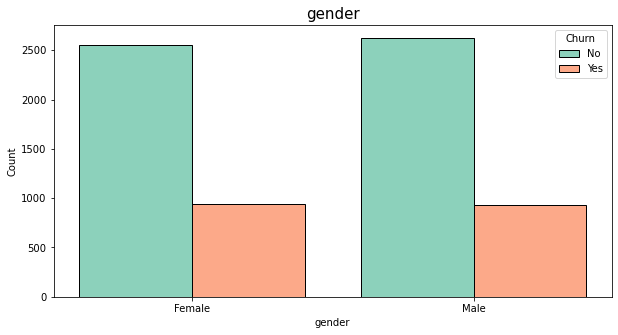

In [28]:
# Gender Ratio base on Churn
plt.figure(figsize=(10,5))
plt.title("gender", fontsize = 15)
sns.histplot(x='gender',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

The customer's gender isn't predictive of churning, males and females are both likely the same to leave (or stay in) the company.

<AxesSubplot:title={'center':'SeniorCitizen'}, xlabel='SeniorCitizen', ylabel='Count'>

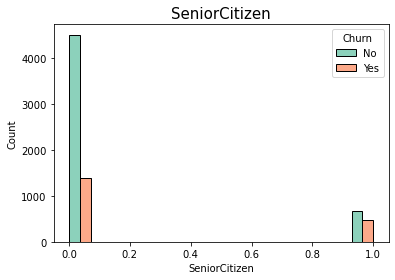

In [29]:
# SeniorCitizen Ratio, 
plt.title("SeniorCitizen", fontsize = 15)
sns.histplot(x='SeniorCitizen',data=dataset,hue='Churn', palette='Set2', multiple="dodge")

The number of senior is under 1000. The senior customer's is predictive of churning, the majority of the senior does churn.

<AxesSubplot:title={'center':'InternetService'}, xlabel='InternetService', ylabel='Count'>

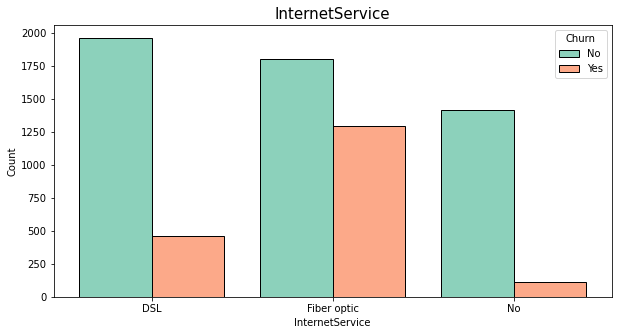

In [30]:
# We can see people with less tenure are leaving ang more tenure are staying, tenure is in month
plt.figure(figsize=(10,5))
plt.title("InternetService", fontsize = 15)
sns.histplot(x='InternetService',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

The chart shows that there is more customers with DSL then customers who chooses Fiber optic service and they are less likely and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a discontent with this type of internet service.

The Internet Service of customer's is strongly related to churning, 1250 out of 1750 peaple with Fiber optic Internet Service churn.

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='MonthlyCharges', ylabel='Count'>

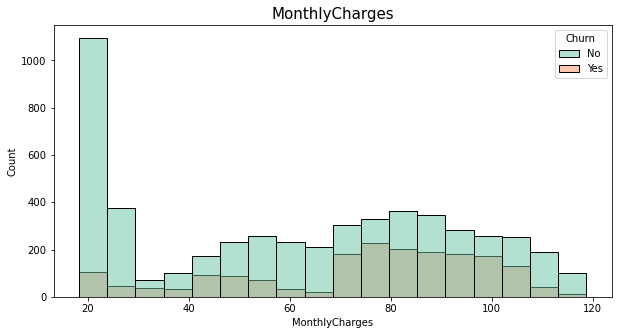

In [31]:
# peeople with less monthly charges are not leaving
plt.figure(figsize=(10,5))
plt.title("MonthlyCharges", fontsize = 15)
sns.histplot(x='MonthlyCharges',data=dataset,hue='Churn', palette='Set2')

The tenure variable is a discrete numerical variable, representing the number of months the customer has stayed in the company.

This variable is an important variable, as it gives us insights on how the customer churn rate changes with respect to customer tenure.

<AxesSubplot:title={'center':'tenure'}, xlabel='tenure', ylabel='Count'>

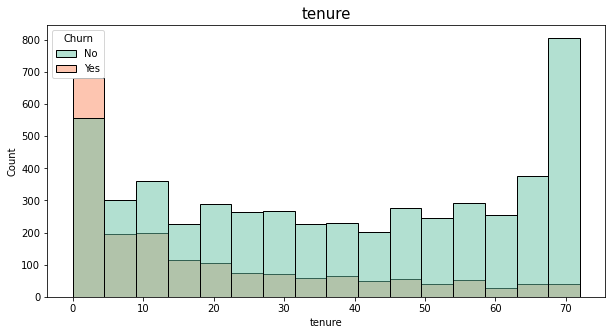

In [32]:
# We can see people with less tenure are leaving ang more tenure are staying, tenure is in month
plt.figure(figsize=(10,5))
plt.title("tenure", fontsize = 15)
sns.histplot(x='tenure',data=dataset,hue='Churn', palette='Set2')

In the first month, people are more likely to churn. This graph follows a normal distribution. To be more precise, we need to check the type of contract that are made to customers.

<AxesSubplot:title={'center':'Contract'}, xlabel='Contract', ylabel='Count'>

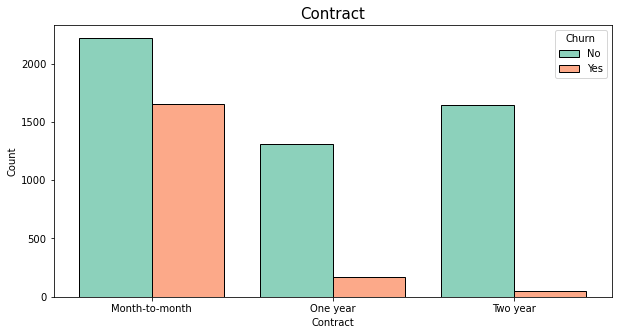

In [33]:
plt.figure(figsize=(10,5))
plt.title("Contract", fontsize = 15)
sns.histplot(x='Contract',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

The majority of customers prefer monthly contracts, which probably require lower fees, and might be also favored by new customers who are not sure if this company would deliver them what they expect.
The customers who use short term contracts are far more likely to churn.

<AxesSubplot:title={'center':'PhoneService'}, xlabel='PhoneService', ylabel='Count'>

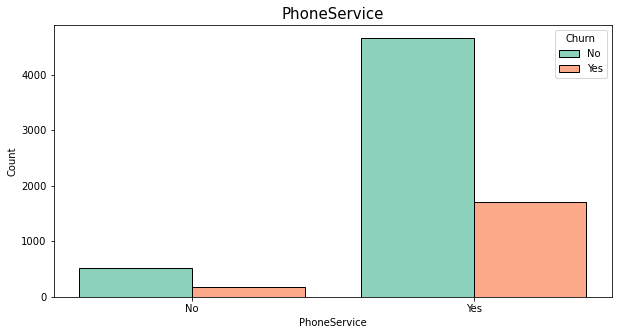

In [34]:
plt.figure(figsize=(10,5))
plt.title("PhoneService", fontsize = 15)
sns.histplot(x='PhoneService',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

We can see that almost all customers have the phone service, which is understandable, because this is the very minimum service.

<AxesSubplot:title={'center':'Monthly charges distribution'}, xlabel='MonthlyCharges', ylabel='Count'>

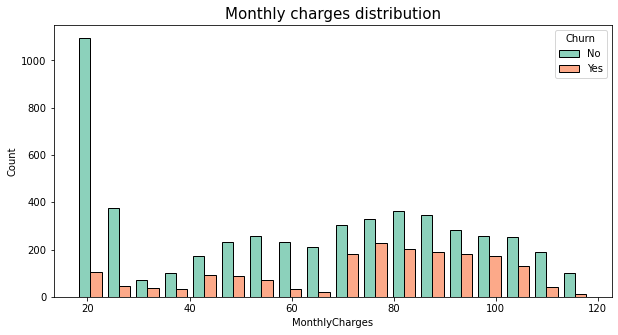

In [35]:
plt.figure(figsize=(10,5))
plt.title("Monthly charges distribution", fontsize = 15)
sns.histplot(x='MonthlyCharges',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

In addition, customer who have higher monthly charges, are more likely to churn.

<AxesSubplot:title={'center':'PaymentMethod'}, xlabel='PaymentMethod', ylabel='Count'>

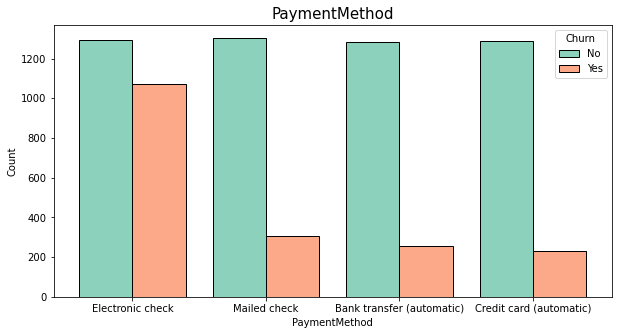

In [36]:
plt.figure(figsize=(10,5))
plt.title("PaymentMethod", fontsize = 15)
sns.histplot(x='PaymentMethod',data=dataset,hue='Churn', palette='Set2', shrink=.8, multiple="dodge")

The chart shows that there is the same amount of people paying with different methods. However, more customers with Electronic Check than the other payment methods. It's important to remember that the customers who use Electronic Check can only use it once, so to speak, it is evident that they have a high churn rate.

### Correlation

/home/amir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/amir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

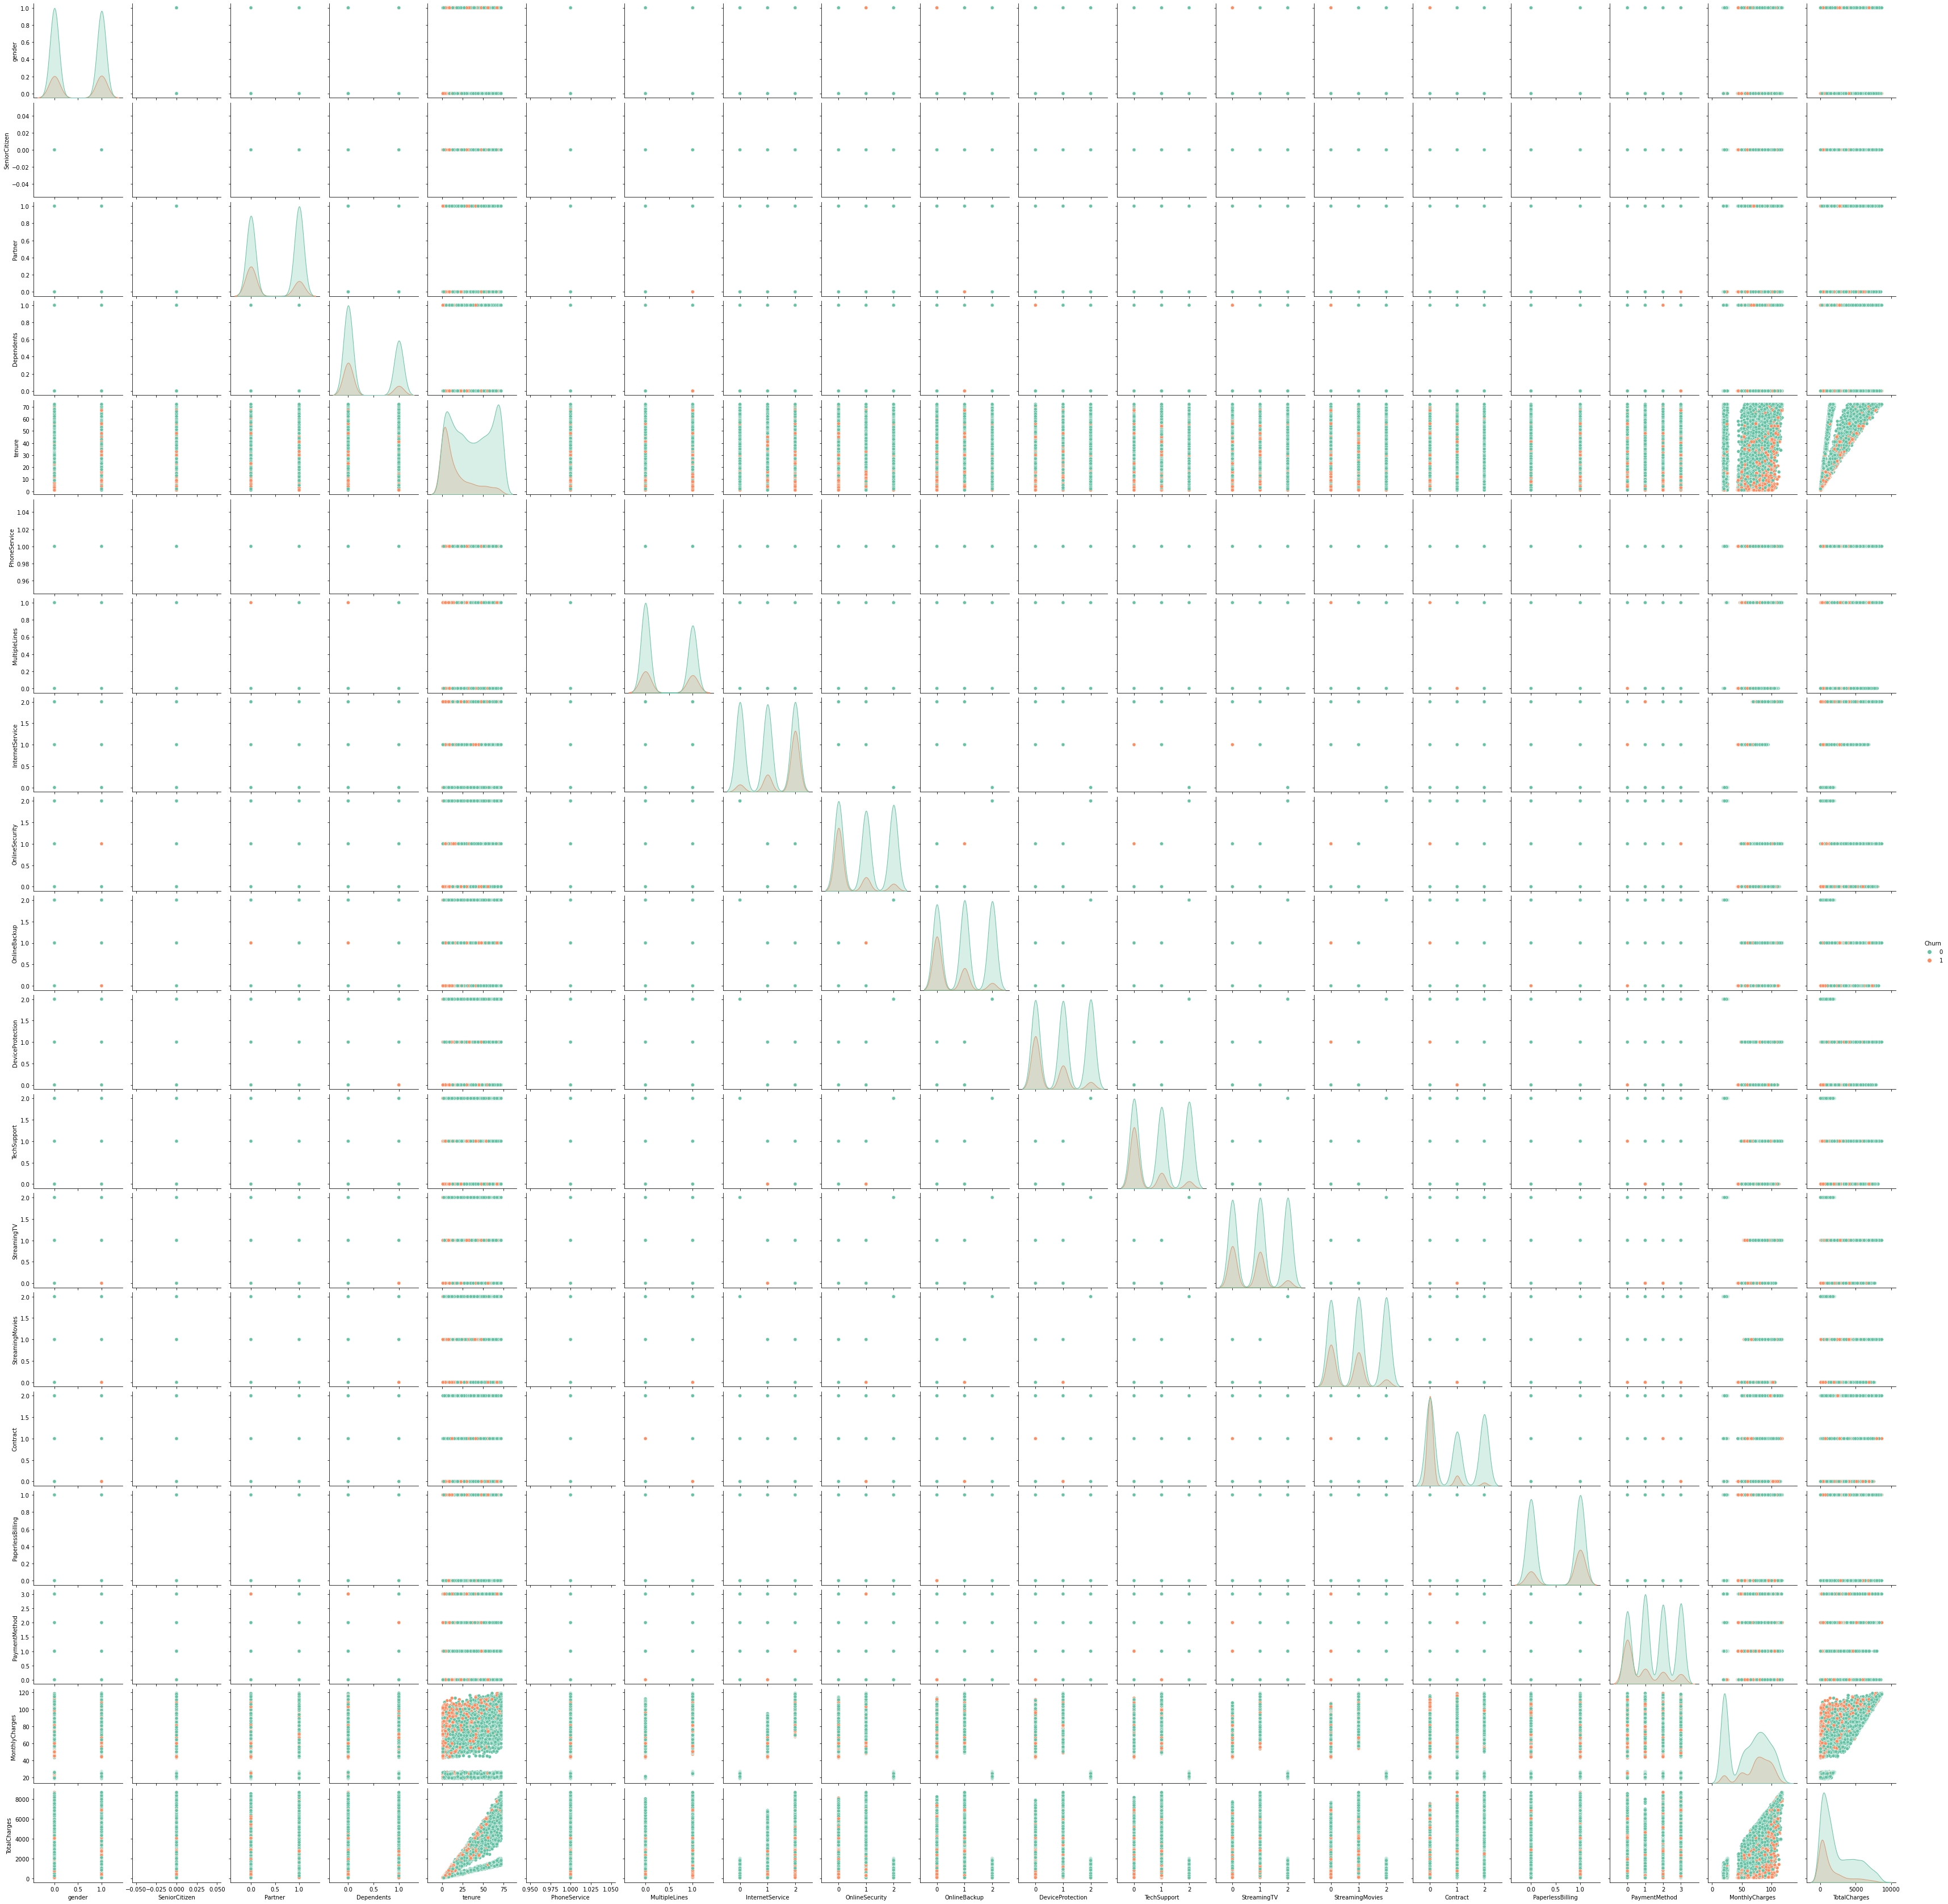

In [37]:
plt.figure(figsize=(6,6))
sns.pairplot(df.iloc[:,1:],hue='Churn',palette='Set2')
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

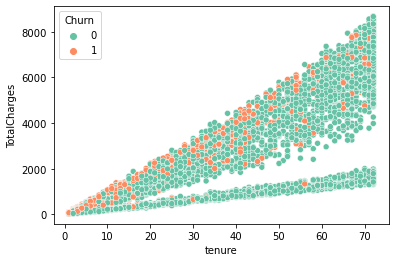

In [38]:
sns.scatterplot(x='tenure',y='TotalCharges',data=df, hue='Churn', palette='Set2')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

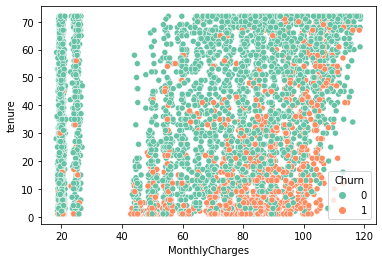

In [39]:
sns.scatterplot(x='MonthlyCharges',y='tenure',data=df, hue='Churn', palette='Set2')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

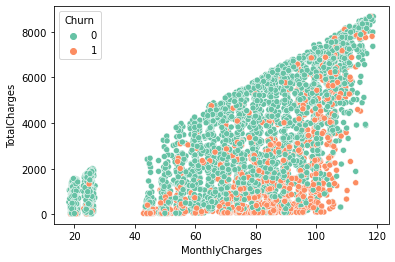

In [40]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df, hue='Churn', palette='Set2')

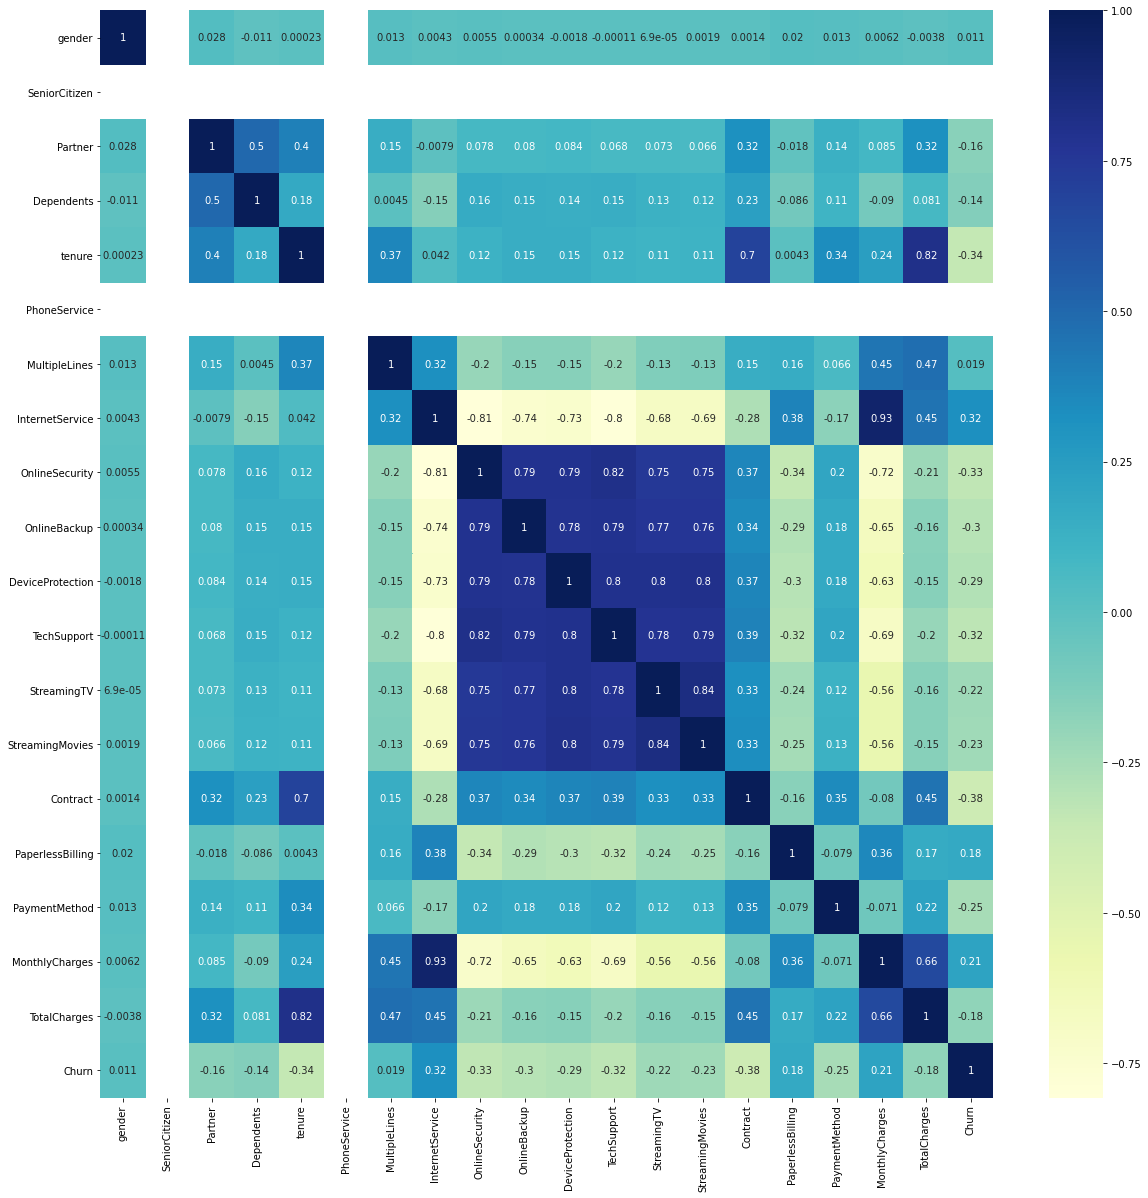

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In order to perform a complete analysis, the correlation matrix takes into account the different characteristics present in the Dataframe.

The values present in the correlation matrix must be expressed as a decimal value in the range [-1,+1] indicating an inverse correlation or a direct correlation respectively.

When the calculated value of the correlation is close to the value 0, it is not possible to define the correlation between the characteristics considered. 

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies are higly coorelated between each other. Thus, we will remove them and let alone DeviceProtection during the preparation phase of the data.
Same thing apply to tenure and Contract.

However, if it's come close to 1 we believe that both columns are identical.

# Preprare and pre-process the data

#### Remove unneeded columns :

In [42]:
df.duplicated(['customerID'], keep='first')

1       False
2       False
4       False
5       False
6       False
        ...  
7035    False
7037    False
7038    False
7039    False
7042    False
Length: 5314, dtype: bool

If there were occurrence in the column, we would have seen them at the top of the returned column. Based on this fact, every row is different, we can remove it from the dataset.

In [43]:
# Dropp Unneeded columns
df.drop(['customerID'], axis = 1, inplace = True)
df.drop(['OnlineSecurity'], axis = 1, inplace = True)
df.drop(['OnlineBackup'], axis = 1, inplace = True)
df.drop(['TechSupport'], axis = 1, inplace = True)
df.drop(['StreamingTV'], axis = 1, inplace = True)
df.drop(['StreamingMovies'], axis = 1, inplace = True)

#### Normalization :

Due to the presence of data expressed with similar numerical range, normalization must be performed, we will be using the MinMaxScaler() method.

In [44]:
names = df.columns

# Data Normalization
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=names)

In [45]:
# Make a copy of the normalized data and let's take a look at the new numbers
scaled_df1 = scaled_df.copy()
scaled_df1.head(16)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0.0,0.0,0.464789,0.0,0.0,0.5,0.5,0.5,0.0,0.333333,0.385075,0.215867,0.0
1,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.5,0.0,0.0,1.0,0.333333,0.354229,0.010310,1.0
2,1.0,0.0,0.0,0.0,0.014085,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.521891,0.015330,1.0
3,1.0,0.0,0.0,0.0,0.098592,0.0,1.0,1.0,0.5,0.0,1.0,0.000000,0.809950,0.092511,1.0
4,0.0,0.0,0.0,1.0,0.295775,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.704975,0.222779,0.0
5,1.0,0.0,1.0,0.0,0.380282,0.0,1.0,1.0,0.5,0.0,1.0,0.000000,0.861194,0.349325,1.0
6,0.0,0.0,0.0,1.0,0.859155,0.0,0.0,0.5,0.0,0.5,0.0,0.666667,0.377114,0.400317,0.0
7,0.0,0.0,1.0,1.0,0.169014,0.0,0.0,0.5,0.0,0.0,1.0,0.333333,0.315423,0.065619,0.0
8,0.0,0.0,0.0,0.0,0.211268,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.006965,0.035541,0.0
9,0.0,0.0,1.0,0.0,0.802817,0.0,1.0,1.0,0.5,0.5,0.0,1.000000,0.816915,0.653393,0.0


#### Split the dataset into Trainning et Test set :

In [46]:
# train test split
X = df.drop('Churn',axis='columns')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Classification methodes :

## Random Forest Classifier

Random Forest Classifier est une technique d’ensemble capable d’effectuer des tâches de régression et de classification avec l’utilisation de multiples arbres décisionnels et une technique appelée bootstrap et agrégation, communément appelée ensachage. L’idée est de combiner plusieurs arbres décisionnels pour déterminer le résultat final plutôt que de s’appuyer sur des arbres décisionnels individuels.



In [47]:
# Apply RFC
rfc = RandomForestClassifier(random_state=0) 
rfc.fit(X_train, y_train)
pred_RFR = rfc.predict(X_test) 
print(classification_report(y_test,pred_RFR))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       807
           1       0.56      0.45      0.50       256

    accuracy                           0.78      1063
   macro avg       0.70      0.67      0.68      1063
weighted avg       0.77      0.78      0.77      1063

Mean Absolute Error: 0.21636876763875823
Mean Squared Error: 0.21636876763875823
Root Mean Squared Error: 0.465154563170951


In [48]:
A = np.array([ round(metrics.precision_score(y_test, pred_RFR),4),
    round(metrics.recall_score(y_test, pred_RFR),4),
    round(metrics.f1_score(y_test, pred_RFR),4)])
A = np.reshape(A, (1, 3))
A

array([[0.5637, 0.4492, 0.5   ]])

# Imbalanced data

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations. One class label has a very high number of observations and the other has a very low number of observations. Such as our dataset with 76% over 23% of churn :

0    4047
1    1267
Name: Churn, dtype: int64


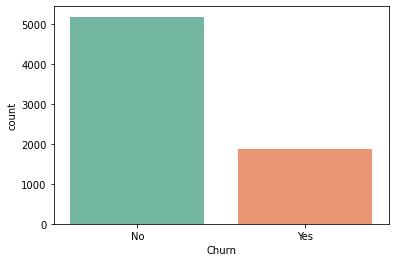

In [49]:
sns.countplot(x="Churn", data=dataset, palette='Set2')
print(df['Churn'].value_counts())

## Approach to deal with the imbalanced dataset problem

In [50]:
print(f'Recall score of RFC classification = ',round(metrics.recall_score(y_test, pred_RFR),4))

Recall score of RFC classification =  0.4492


### Method 1 : Resampling (Oversample)

When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

In [51]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4047, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    4047
0    4047
Name: Churn, dtype: int64


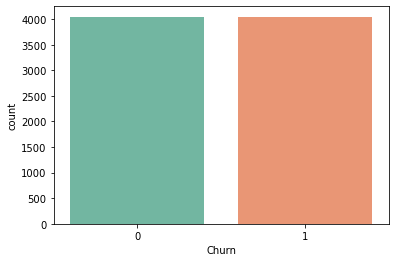

In [52]:
sns.countplot(x="Churn", data=df_upsampled, palette='Set2')
print(df_upsampled['Churn'].value_counts())

Once we finish balancing the data, it i s time to run a classification method.

In [53]:
# train test split
X = df_upsampled.drop('Churn',axis='columns')
y = df_upsampled['Churn']
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
# Apply RFC
rfc = RandomForestClassifier(random_state=0) 
rfc.fit(X1_train, y1_train)
pred1_RFR = rfc.predict(X1_test) 
print(classification_report(y1_test,pred1_RFR))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, pred1_RFR))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, pred1_RFR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, pred1_RFR)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       805
           1       0.87      0.96      0.91       814

    accuracy                           0.91      1619
   macro avg       0.91      0.91      0.91      1619
weighted avg       0.91      0.91      0.91      1619

Mean Absolute Error: 0.09079678814082767
Mean Squared Error: 0.09079678814082767
Root Mean Squared Error: 0.3013250539547412


In [55]:
B = np.array([ round(metrics.precision_score(y1_test, pred1_RFR),4),
    round(metrics.recall_score(y1_test, pred1_RFR),4),
    round(metrics.f1_score(y1_test, pred1_RFR),4)])
B = np.reshape(B, (1, 3))
B

array([[0.8726, 0.9595, 0.914 ]])

### Method 2 : BalancedBaggingClassifier

When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. A BalancedBaggingClassifier is the same as a sklearn classifier but with additional balancing. It includes an additional step to balance the training set at the time of fit for a given sampler. This classifier takes two special parameters “sampling_strategy” and “replacement”. The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not.

In [56]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=True,
                                random_state=0)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [57]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       807
           1       0.56      0.31      0.40       256

    accuracy                           0.77      1063
   macro avg       0.68      0.62      0.63      1063
weighted avg       0.75      0.77      0.75      1063



In [58]:
C = np.array([ round(metrics.precision_score(y_test, preds),4),
    round(metrics.recall_score(y_test, preds),4),
    round(metrics.f1_score(y_test, preds),4)])
C = np.reshape(C, (1, 3))
C

array([[0.5556, 0.3125, 0.4   ]])

### Compare method : 
The accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions. This may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class.

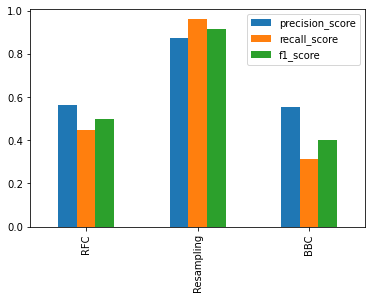

In [59]:
# plot scoring to see the difference
Data = np.reshape([A, B, C], (3, 3))
fig = pd.DataFrame(Data, columns=["precision_score", "recall_score", "f1_score"], index=['RFC', 'Resampling', 'BBC'])
fig.plot.bar();
plt.show()